### Gompertz Model - SR-T performance:

In [8]:
# add the parent directory to the system path:
import sys
from pathlib import Path
parent_dir = Path('..').resolve() 
sys.path.append(str(parent_dir)) 

# import:
import numpy as np
import os
import matplotlib.pyplot as plt
import equations
from evaluation_trajectories import evaluation1D, evaluation1D_p, evaluation1D_2p 

# seed:
np.random.seed(666)

### Standard:

In [2]:
# select the ODE:
ode_name = 'GompertzODE'
init_high = [0.01]
init_low = [0.01]

ode_param=[1.5, 1.5]
x_id = 0
freq = 10
n_sample = 50 
noise_ratio = 0.01
alg = 'diff'
seed = 0
n_seed = 5

ode = equations.get_ode(ode_name, ode_param)
dt = 1 / freq
time_vector = np.arange(0, ode.T + dt, dt)
#print(np.shape(time_vector))
#print(time_vector)

5
0.6
[0.04658702305012469, 0.0005647238559008396, 0.0014050227024368052, 0.04658702305012469, 0.0008113094413743914]
RMSE on test-case 0:  0.019191020419992284


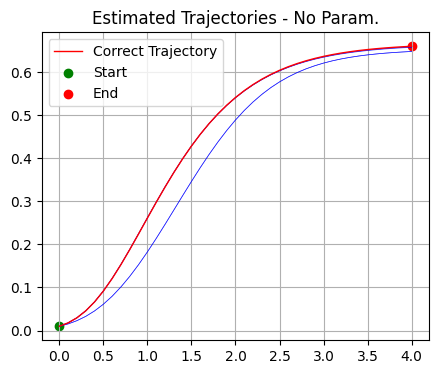

In [3]:
# evaluation:
xt_true, est_trajectories, rmse = evaluation1D(ode_name, ode_param, x_id, freq, n_sample, noise_ratio, alg, seed, n_seed, init_high, init_low)
print('RMSE on test-case 0: ', rmse)

# plot:
plt.figure(figsize=(5, 4))

for i in range(np.shape(est_trajectories)[0]):
    plt.plot(time_vector, est_trajectories[i][:, 0, 0], color='blue', linewidth=0.5, alpha=0.7)

plt.plot(time_vector, xt_true[:, 0, 0], color='red', linewidth=1.0, label='Correct Trajectory')

plt.scatter(time_vector[0], xt_true[:, 0, 0][0], color='green', label='Start')
plt.scatter(time_vector[-1], xt_true[:, 0, 0][-1], color='red', label='End')

plt.title('Estimated Trajectories - No Param.')
plt.legend()
plt.grid(True) 

### Parametrization on $b$

In [4]:
# select the ODE:
ode_name = 'GompertzODE_par_b'
init_high = [0.01, 1.5]
init_low = [0.01, 1.5]

ode_param=None
x_id = 0
freq = 10
n_sample = 50
noise_ratio = 0.01
alg = 'diff'
seed = 0
n_seed = 5
N = 1

ode = equations.get_ode(ode_name, ode_param)
dt = 1 / freq
time_vector_b = np.arange(0, ode.T + dt, dt)

5
1.0
[0.0003157928401250681, 0.0008951141919124577, 0.002128631488345839, 0.004338193328702165, 0.017603226174001653]
RMSE on test-case 0:  0.005056191604617437


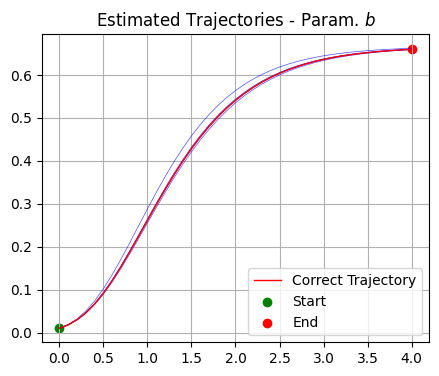

In [5]:
# evaluation: 
xt_true_b, est_trajectories_b, rmse_b = evaluation1D_p(ode_name, ode_param, x_id, freq, n_sample, noise_ratio, alg, seed, n_seed, init_high, init_low, N)
print('RMSE on test-case 0: ', rmse_b)

# plot:
plt.figure(figsize=(5, 4))

for i in range(np.shape(est_trajectories_b)[0]):
    plt.plot(time_vector_b, est_trajectories_b[i][:, 0, 0], color='blue', linewidth=0.5, alpha=0.7)

plt.plot(time_vector_b, xt_true_b[:, 0, 0], color='red', linewidth=1.0, label='Correct Trajectory')

plt.scatter(time_vector_b[0], xt_true_b[:, 0, 0][0], color='green', label='Start')
plt.scatter(time_vector_b[-1], xt_true_b[:, 0, 0][-1], color='red', label='End')

plt.title('Estimated Trajectories - Param. $b$')
plt.legend()
plt.grid(True) 


In [4]:
# RMSE:

N = 50
a, b = 0.0, 0.01  # first input interval
c, d = 1.0, 2.0  # second input interval
init_point = np.empty((N, 2))
init_point[:, 0] = np.random.uniform(a, b, N) 
init_point[:, 1] = np.random.uniform(c, d, N) 
#print(init_point)
#print(np.shape(init_point))

RMSEb = evaluation1D_p(ode_name, ode_param, x_id, freq, n_sample, noise_ratio, alg, seed, n_seed, init_high, init_low, N, init_point)
print('RMSE (overall): ', RMSEb)

5
1.0
[0.00038026740925118865, 0.0010778785252792556, 0.002563280302677046, 0.005223702270217658, 0.021198691939426955]
RMSE (overall):  0.006088764089370421


### Parametrization on $a,b$

In [9]:
# select the ODE:
ode_name = 'GompertzODE_par_ab'
init_high = [0.01, 1.5, 1.5]
init_low = [0.01, 1.5, 1.5]

ode_param=None
x_id = 0
freq = 10
n_sample = 50 
noise_ratio = 0.01
alg = 'diff'
seed = 0
n_seed = 5

ode = equations.get_ode(ode_name, ode_param)
dt = 1 / freq
time_vector_ab = np.arange(0, ode.T + dt, dt)

5
1.0
[0.0, 0.0, 0.0, 0.0, 0.0]
RMSE on test-case 0:  0.0


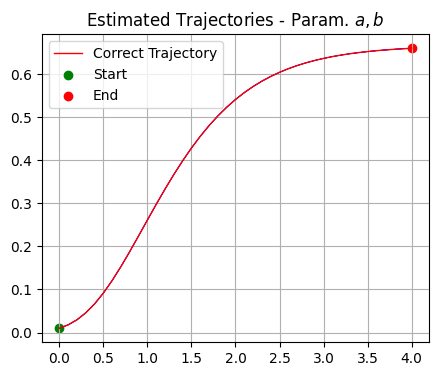

In [10]:
# evaluation: 
xt_true_ab, est_trajectories_ab, rmse_ab = evaluation1D_2p(ode_name, ode_param, x_id, freq, n_sample, noise_ratio, alg, seed, n_seed, init_high, init_low)
print('RMSE on test-case 0: ', rmse_ab)

# plot:
plt.figure(figsize=(5, 4))

for i in range(np.shape(est_trajectories_ab)[0]):
    plt.plot(time_vector_ab, est_trajectories_ab[i][:, 0, 0], color='blue', linewidth=0.5, alpha=0.7)

plt.plot(time_vector_ab, xt_true_ab[:, 0, 0], color='red', linewidth=1.0, label='Correct Trajectory')

plt.scatter(time_vector_ab[0], xt_true_ab[:, 0, 0][0], color='green', label='Start')
plt.scatter(time_vector_ab[-1], xt_true_ab[:, 0, 0][-1], color='red', label='End')

plt.title('Estimated Trajectories - Param. $a,b$')
plt.legend()
plt.grid(True) 


In [7]:
# RMSE:

N = 50
a, b = 0.0, 0.01  # first input interval
c, d = 1.0, 2.0  # second input interval
e, f = 1.0, 2.0  # third input interval
init_point = np.empty((N, 3))
init_point[:, 0] = np.random.uniform(a, b, N) 
init_point[:, 1] = np.random.uniform(c, d, N) 
init_point[:, 2] = np.random.uniform(e, f, N)
#print(init_point)
print(np.shape(init_point))
#init_point = [[0.003, 1.3], [0.005, 1.5], [0.007, 1.7]]

RMSEab = evaluation1D_2p(ode_name, ode_param, x_id, freq, n_sample, noise_ratio, alg, seed, n_seed, init_high, init_low, N, init_point)
print('RMSE (overall): ', RMSEab)

(50, 3)
5
1.0
[0.0, 0.0, 0.0, 0.0, 0.0]
RMSE (overall):  0.0


5
1.0
[0.0, 0.0, 0.0, 0.0, 0.0]
RMSE on test-case 0:  0.0


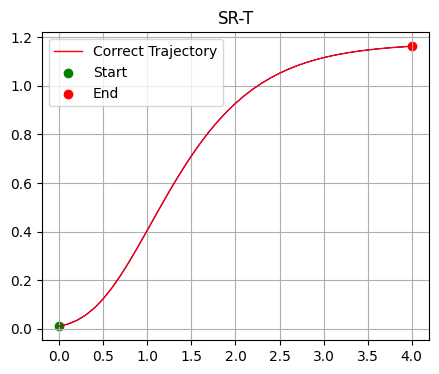

In [13]:
# evaluation: 
xt_true_ab, est_trajectories_ab, rmse_ab = evaluation1D_2p(ode_name, ode_param, x_id, freq, n_sample, noise_ratio, alg, seed, n_seed, [0.01, 1.5, 0.85], [0.01, 1.5, 0.85])
print('RMSE on test-case 0: ', rmse_ab)

# plot:
plt.figure(figsize=(5, 4))

for i in range(np.shape(est_trajectories_ab)[0]):
    plt.plot(time_vector_ab, est_trajectories_ab[i][:, 0, 0], color='blue', linewidth=0.5, alpha=0.7)

plt.plot(time_vector_ab, xt_true_ab[:, 0, 0], color='red', linewidth=1.0, label='Correct Trajectory')

plt.scatter(time_vector_ab[0], xt_true_ab[:, 0, 0][0], color='green', label='Start')
plt.scatter(time_vector_ab[-1], xt_true_ab[:, 0, 0][-1], color='red', label='End')

plt.title('SR-T')
plt.legend()
plt.grid(True) 

### plot x report:

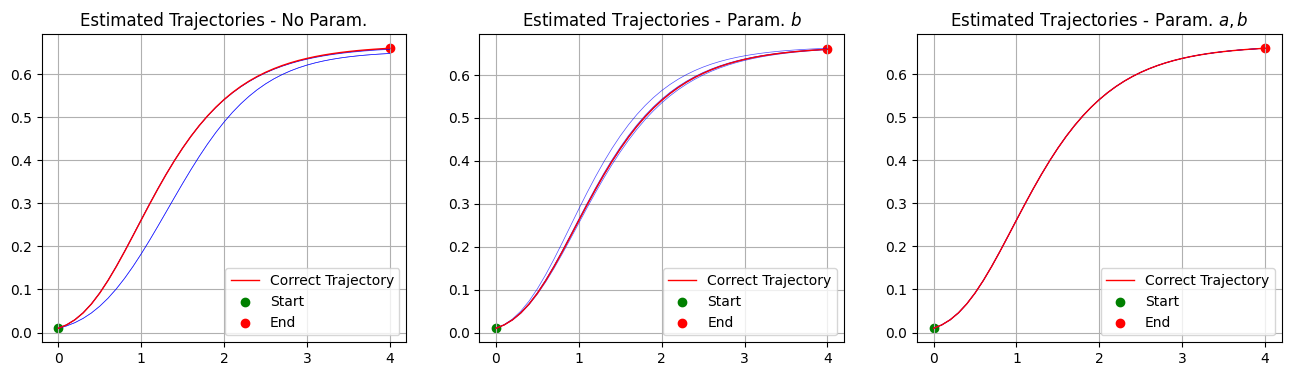

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

for i in range(np.shape(est_trajectories)[0]):
    axs[0].plot(time_vector, est_trajectories[i][:, 0, 0], color='blue', linewidth=0.5, alpha=0.7)
axs[0].plot(time_vector, xt_true[:, 0, 0], color='red', linewidth=1.0, label='Correct Trajectory')
axs[0].scatter(time_vector[0], xt_true[:, 0, 0][0], color='green', label='Start')
axs[0].scatter(time_vector[-1], xt_true[:, 0, 0][-1], color='red', label='End')
axs[0].set_title('Estimated Trajectories - No Param.')
axs[0].legend()
axs[0].grid(True) 

for i in range(np.shape(est_trajectories_b)[0]):
    axs[1].plot(time_vector_b, est_trajectories_b[i][:, 0, 0], color='blue', linewidth=0.5, alpha=0.7)
axs[1].plot(time_vector_b, xt_true_b[:, 0, 0], color='red', linewidth=1.0, label='Correct Trajectory')
axs[1].scatter(time_vector_b[0], xt_true_b[:, 0, 0][0], color='green', label='Start')
axs[1].scatter(time_vector_b[-1], xt_true_b[:, 0, 0][-1], color='red', label='End')
axs[1].set_title('Estimated Trajectories - Param. $b$')
axs[1].legend()
axs[1].grid(True) 

for i in range(np.shape(est_trajectories_ab)[0]):
    axs[2].plot(time_vector_ab, est_trajectories_ab[i][:, 0, 0], color='blue', linewidth=0.5, alpha=0.7)
axs[2].plot(time_vector_ab, xt_true_ab[:, 0, 0], color='red', linewidth=1.0, label='Correct Trajectory')
axs[2].scatter(time_vector_ab[0], xt_true_ab[:, 0, 0][0], color='green', label='Start')
axs[2].scatter(time_vector_ab[-1], xt_true_ab[:, 0, 0][-1], color='red', label='End')
axs[2].set_title('Estimated Trajectories - Param. $a,b$')
axs[2].legend()
axs[2].grid(True) 

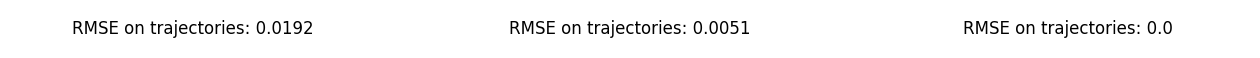

In [11]:
rmse = round(rmse, 4)
rmse_b = round(rmse_b, 4)
rmse_ab = round(rmse_ab, 4)

fig, axs = plt.subplots(1, 3, figsize=(16, 0.5))

axs[0].text(0.5, 0.5, f'RMSE on trajectories: {rmse}', ha='center', va='center', fontsize=12)
axs[0].axis('off')

axs[1].text(0.5, 0.5, f'RMSE on trajectories: {rmse_b}', ha='center', va='center', fontsize=12)
axs[1].axis('off')

axs[2].text(0.5, 0.5, f'RMSE on trajectories: {rmse_ab}', ha='center', va='center', fontsize=12)
axs[2].axis('off')

plt.show()